1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#the variance of a Poisson variable is equal to its mean
Z = (15-6.3)/np.sqrt(6.3)
print("Z =", Z)
if abs(Z)>2:
    print("In 2005 there has been a significantly larger number of hurricanes")
else:
    print("The number of hurricanes in 2005 was not particularly larger than the usual")

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Z = 3.4661629670697414
In 2005 there has been a significantly larger number of hurricanes


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [2]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
x1 = pre.mean()
x2 = post.mean()
sigma = np.sqrt((pre.var()+post.var())/2)
T = (x1-x2)/(sigma*np.sqrt(2/len(pre)))
print("T =", T)
if abs(T)>2:
    print("The change in blood pressures was statistically significant")
else:
    print("The change in blood pressures was not statistically significant")

T = -3.991846326292112
The change in blood pressures was statistically significant


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

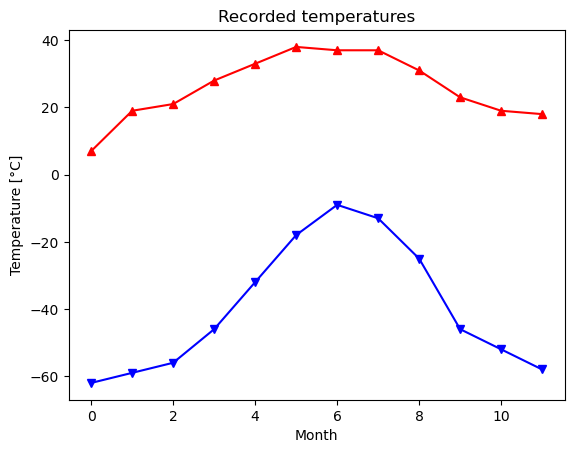

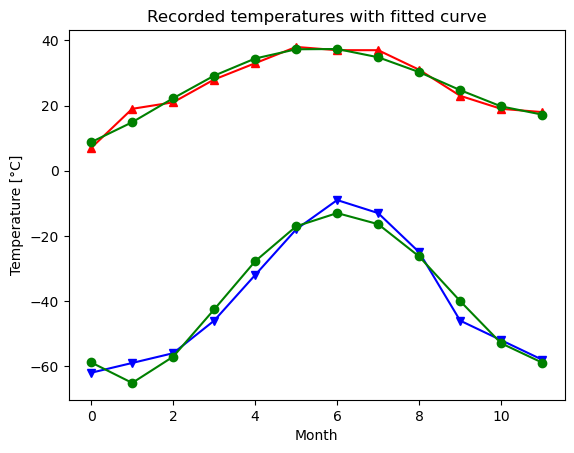

The curve fits the data with 96.44167039763398 % accuracy
The difference between min and max values at each time is preserved with 99.94990389292022 % accuracy
The difference between min and max values is preserved within the fit accuracy


In [3]:
tmin = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
tmax = np.array([7,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])

from scipy.optimize import curve_fit
#I defined a function and added as many degree as necessary
def func(x, a, b, c, d, e):
    return a*(x**4) + b*(x**3) + c*(x**2) + d*x + e

#plot the temperatures
plt.figure()
plt.title("Recorded temperatures")
plt.plot(tmin, "b", marker="v")
plt.plot(tmax, "r", marker="^")
plt.ylabel("Temperature [°C]")
plt.xlabel("Month")
plt.show()

#fit tmin
g = [1, 1, 1, 1, 1]
c, cov = curve_fit (func, np.arange(len(tmin)), tmin, g)
test_ar = np.arange(len(tmin))
minpred = np.empty(len(test_ar))
for i in range (len(test_ar)):
    minpred[i] = func(test_ar[i], c[0], c[1], c[2], c[3], c[4])

#fit tmax
b, cov = curve_fit (func, np.arange(len(tmax)), tmax, g)
test_ar = np.arange(len(tmax))
maxpred = np.empty(len(test_ar))
for i in range (len(test_ar)):
    maxpred[i] = func(test_ar[i], b[0], b[1], b[2], b[3], b[4])

#plot the real values and the predicted ones
plt.figure()
plt.title("Recorded temperatures with fitted curve")
plt.plot(tmin, "b", marker="v")
plt.plot(tmax, "r", marker="^")
plt.plot(maxpred, "g", marker="o")
plt.plot(minpred, "g", marker="o")
plt.ylabel("Temperature [°C]")
plt.xlabel("Month")
plt.show()

#estimation of goodness of fitting for both the temperature
ssr = np.sum((tmin - minpred)**2)
tss = np.sum((tmin.mean() - tmin)**2)
R2m = 1 - (ssr/tss)
ssr = np.sum((tmax - maxpred)**2)
tss = np.sum((tmax.mean() - tmax)**2)
R2M = 1 - (ssr/tss)
#select the minimum accuracy
if R2m<R2M:
    r2min=R2m
else:
    r2min=R2M
print("The curve fits the data with", r2min*100, "% accuracy")
'''
The curve fits decently well the data thanks to its high degree
'''
#estimation of how good the difference between 2 predicted values of min and max is preserved while fitting
real_diff = tmax - tmin
pred_diff = maxpred - minpred
ssr = np.sum((real_diff - pred_diff)**2)
tss = np.sum((real_diff.mean() - tmin)**2)
R2 = 1 - (ssr/tss)
print("The difference between min and max values at each time is preserved with", R2*100, "% accuracy")
if R2>r2min:
    print("The difference between min and max values is preserved within the fit accuracy")
else:
    print("The difference between min and max values is not preserved within the fit accuracy")

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

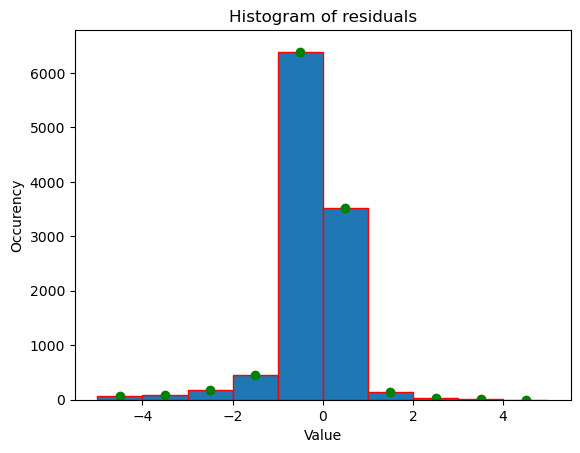

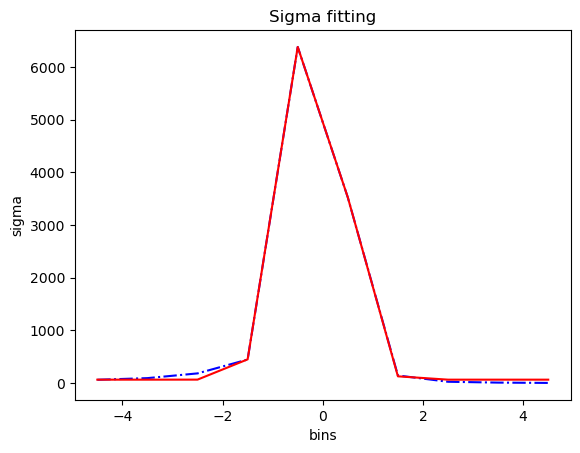

p value :  1.7525677307715579e-74


"\nSince the p value is very small we can say it's a good fit\n"

In [4]:
import pandas as pd
#read the pickle file
dataset = pd.read_pickle(r"data/residuals_261.pkl")
dataset = dataset[()]

#convert it into a pandas dataframe
data = pd.DataFrame(dataset)
data = data[abs(data["residuals"])<6]
#print(data)

#plot the histogram
plt.figure()
plt.title("Histogram of residuals")
n, bins, _ = plt.hist(data["residuals"], edgecolor="red", bins=np.linspace(-5, 5, num=11))
plt.xlabel("Value")
plt.ylabel("Occurency")
# Compute poisson uncertainty
bins_center=np.zeros(len(bins)-1)
for i in range(len(bins)-1):
    bins_center[i] = (bins[i+1]+bins[i])/2
y = n
x = bins_center
sigma = np.sqrt(n)
plt.errorbar(x, y, yerr=sigma, fmt='o', c='g')
plt.show()

def func(x, A, offset, sigma, c):
    return c + (A * stats.norm.pdf(x,offset,sigma))

popt, pcov = curve_fit(func, x, y, p0=[100,1,1,1])
y_new = func(x, *popt)
fig = plt.figure()
plt.plot(x, y, 'b-.', x, y_new, 'r')
plt.xlabel('bins')
plt.ylabel('sigma')
plt.title('Sigma fitting')
plt.show()

#Perform a goodness-of-fit test
test, p_value = stats.chisquare(y, y_new)
print('p value : ', p_value)
'''
Since the p value is very small we can say it's a good fit
'''

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

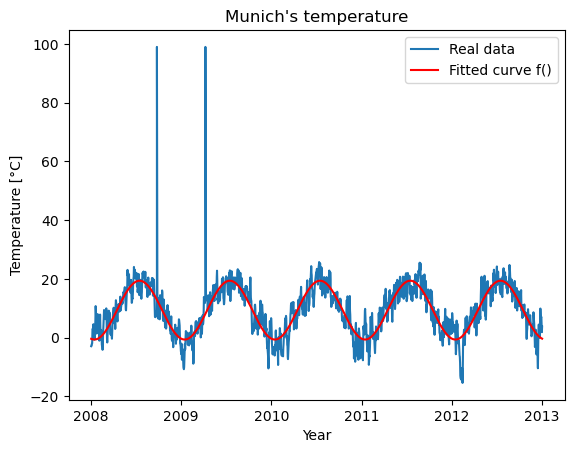

The parameters for the best fit of f() are: [a, b, c] = [-10.01800059  12.3254922    9.35102928]
with an estimated error on those parameters of: [ERR_a, ERR_b, ERR_c] = [0.15576084 0.01554643 0.1101339 ]
The overall average temperature in Munich is 9.352349012705366 °C
The model predict a minimum temperature in winter of -0.6669713071531511 °C
The model predict a maximum temperature in summer of 19.368822917775773 °C


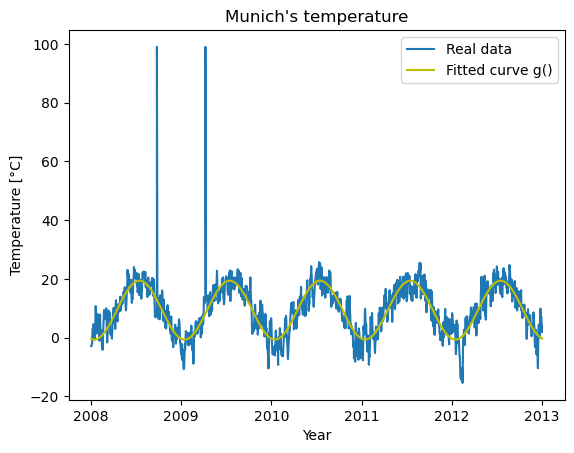

The curve f() fits the data with 69.41079730563187 % accuracy
The curve g() fits the data with 69.41177631135598 % accuracy


In [5]:
from math import pi
def f(t, a, b, c):
    return a*np.cos(2*pi*t+b)+c
def g(t, a, b, c, d):
    return a*np.cos(2*pi*b*t+c)+d

#load the data
temp = np.loadtxt("data/temp_munich.txt")
#filtering to get only temperatures between 2008 and 2012
mask1 = np.where(temp[:, 0]<2013)
temp = temp[mask1]
mask2 = np.where(temp[:, 0]>=2008)
temp=temp[mask2]
#fitting the data with f() function
opt, cov = curve_fit(f, temp[:,0], temp[:,1], p0=[1,1,1])
#computing errors on the parameters from the covariance matrix
err = np.sqrt(np.diag(cov))
#values predicted by f()
predTemp=f(temp[:,0], opt[0], opt[1], opt[2])
#plotting data and fitted curve
plt.figure()
plt.title("Munich's temperature")
plt.plot(temp[:,0], temp[:,1], label="Real data")
plt.plot(temp[:,0], predTemp, "r", label="Fitted curve f()")
plt.xlabel("Year")
plt.ylabel("Temperature [°C]")
plt.legend()
plt.show()
print("The parameters for the best fit of f() are: [a, b, c] =", opt)
print("with an estimated error on those parameters of: [ERR_a, ERR_b, ERR_c] =", err)
#Computing the average based on the data
all_avg = np.sum(temp[:,1])/len(temp[:,1])
print("The overall average temperature in Munich is", all_avg, "°C")
#Find the min and max values in the predicted temperature
maxT = np.max(predTemp)
minT = np.min(predTemp)
print("The model predict a minimum temperature in winter of", minT, "°C")
print("The model predict a maximum temperature in summer of", maxT, "°C")

'''
The b parameter in f() is rapresenting the initial phase of the cos() function, in these case it lets us start the fit
from whatever period of the year without problems
'''

#fitting the data with f() function
gopt, gcov = curve_fit(g, temp[:,0], temp[:,1], p0=[1,1,1,1])
#values predicted by g()
predTempG=g(temp[:,0], gopt[0], gopt[1], gopt[2], gopt[3])
#plotting data and fitted curve
plt.figure()
plt.title("Munich's temperature")
plt.plot(temp[:,0], temp[:,1], label="Real data")
plt.plot(temp[:,0], predTempG, "y", label="Fitted curve g()")
plt.xlabel("Year")
plt.ylabel("Temperature [°C]")
plt.legend()
plt.show()
#estimation of goodness of fitting for f() and g()
fssr = np.sum((temp[:,1] - predTemp)**2)
tss = np.sum((temp[:,1].mean() - temp[:,1])**2)
R2F = 1 - (fssr/tss)
gssr = np.sum((temp[:,1] - predTempG)**2)
R2G = 1 - (gssr/tss)
print("The curve f() fits the data with", R2F*100, "% accuracy")
print("The curve g() fits the data with", R2G*100, "% accuracy")